In [10]:
# Imports
import os
import sys
sys.path.append(os.path.abspath(".."))   # one level up
import numpy as np
# print(os.getcwd())
import cv2
import open3d as o3d
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
from utils.lidar import PointCloud
from utils.camera import ImageData
import utils.utils as utils
from natsort import natsorted

In [11]:
# User parameters
location = 'Holmview'
# location = 'Cambogan'

################ Query filenames and directories #################################
sequence = '20250820_130327'
# sequence = '20250811_113017'
condition = 'flooded'
camera_pos = 'front'
root_directory = f"../../Datasets/FRED/{condition}/KITTI-style"

image_dir = f"{root_directory}/{location}_{sequence}/{camera_pos}-imgs/"
label_dir = f"{root_directory}/{location}_{sequence}/{camera_pos}-labels/"
timestamps = [filename.split('.png')[0] for filename in natsorted(os.listdir(image_dir)) if os.path.isfile(image_dir+filename)]

image_timestamp = timestamps[100]
image_filename = f"{image_dir}/{image_timestamp}.png"
label_filename = f"{label_dir}/{image_timestamp}.png"
img_calib_file = f"../camera_calib.txt"

(-0.5, 1919.5, 1199.5, -0.5)

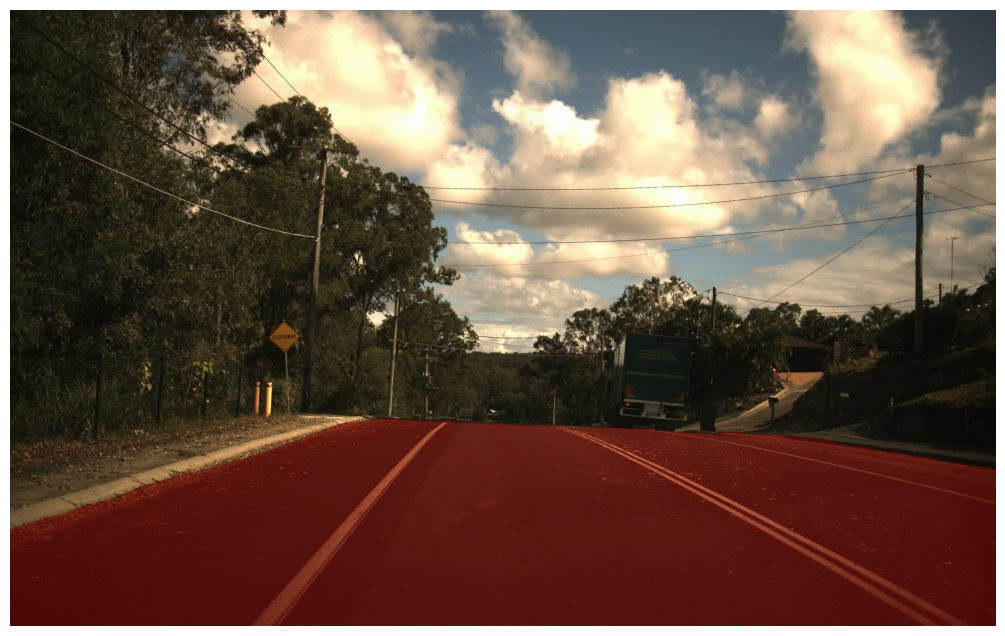

In [12]:
img = ImageData(image_filename, img_calib_file, label_filename)

label_mask = np.any(img.colour_label != img.semantic_classes['other'], axis=-1)

# Create an overlay image
overlay_img = img.image.copy()
overlay_img[label_mask] = cv2.addWeighted(img.image[label_mask], 0.5, img.colour_label[label_mask], 0.5, 0)

plt.figure(figsize=(12.8,8))
plt.imshow(overlay_img[:,:,::-1])
plt.axis('off')
